In [19]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from os import listdir
import mmcv
import glob

In [2]:
config_file = '../configs/catchall/dropout_vanilla.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

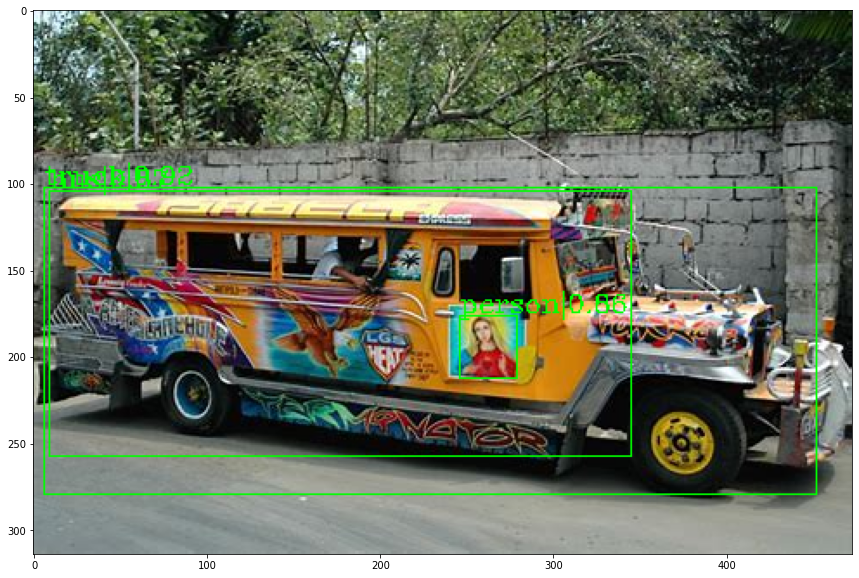

In [50]:
# test a single image

# img = '/home/cyril.cero/mmdetection/test_images/ph suv/SUV-3.jpg'
# img = '/home/cyril.cero/mmdetection/test_images/ph_tricycle/TRIKE_5.jpg'

img = '/home/cyril.cero/mmdetection/test_images/ph_jeep/JEEPNEY_4.jpg'
result = inference_detector(model, img)
show_result_pyplot(model, img, result)
    

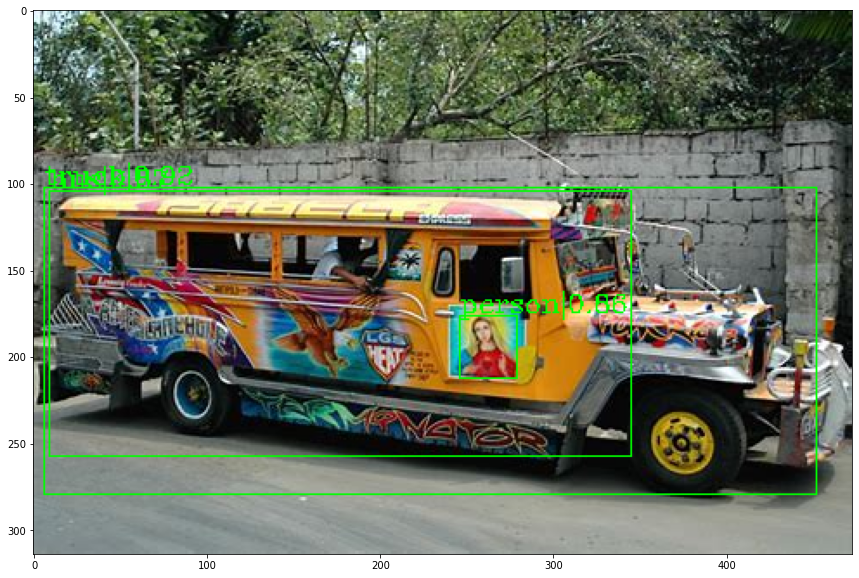

In [49]:
# # test a directory

# img_dir = ''
